<a href="https://colab.research.google.com/github/dtabuena/Accessory-Matlab-DT-Func-/blob/master/Horizontal_E34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'Get Standard Modules'

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import os
from scipy.signal import butter,filtfilt
from tqdm import tqdm
import warnings
from IPython.display import clear_output
from datetime import datetime
import sys
import warnings
import shutil
from google.colab import files
warnings.filterwarnings('ignore')
np.set_printoptions(threshold=sys.maxsize)
clear_output(wait=False)



!pip install openpyxl
!pip install XlsxWriter


'''Get Repositories'''
try: shutil.rmtree('/content/EphysLib')
except: None

"run dtabuena's ephys notebooks"
!git clone https://github.com/dtabuena/EphysLib
to_import = [
            'ABF_Quality_Control.ipynb',
            'Basic_Ephys.ipynb',
            'Simple_ABF_tools.ipynb',
            'fun_math.ipynb',
            'importing_abfs_from_dropbox.ipynb',
            'QC_recoding_dataframe.ipynb',
            'Analyzers/input_resistance_analyzer.ipynb',
            'Analyzers/gain_analyzer.ipynb',
            'Analyzers/latencey_analyzer.ipynb',
            'Analyzers/IV_analyzer.ipynb',
            'Analyzers/Vm_analyzer.ipynb',
            'Analyzers/membrane_analyzer.ipynb',
            'Analyzers/rheobase_analyzer.ipynb',
            'Ephys_wrapper.ipynb',
            ]
for i in to_import:
    f = '/content/EphysLib/' + i
    %run $f




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 1.2 MB/s eta 0:00:00
Cloning into 'EphysLib'...
remote: Enumerating objects: 1024, done.
remote: Counting objects: 100% (401/401), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 1024 (delta 302), reused 230 (delta 193), pack-reused 623
Receiving objects: 100% (1024/1024), 14.43 MiB | 8.13 MiB/s, done.
Resolving deltas: 100% (679/679), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 2.2 MB/s eta 0:00:00


In [6]:
dataset = {'data_name': 'Ventral_HC',
           'data_source': "https://www.dropbox.com/sh/wmexb9sy2ep04mt/AABIhYHt3HmoDgBXGohkv-caa?dl=0",
           'file_naming_scheme': ['Rec_date','GenoType','Sex','Age','Orientation','Slice_Num','Cell_num','Cell_Type'],
           }
           
data_name = dataset['data_name']
data_source = dataset['data_source']
file_naming_scheme = dataset['file_naming_scheme']

''' Gather and Catalog Source Data'''
file_loc = get_drobox_folder(data_source, 'my_ephys_data_' + data_name)
clear_output(wait=False)   
abf_recordings_df, protocol_set = catalogue_recs(file_loc,file_naming_scheme)
print(protocol_set)
display(abf_recordings_df.columns)

['IC - Latentcy 800pA-1s', 'I0 - 3min GapFree', 'VC - MemTest-10ms-160ms', 'VC - Multi IV - 150ms', 'IC - R input', 'IC - Gain - D20pA', 'IC - Rheobase']


Index(['Recording_name', 'cell_id', 'Rec_date', 'GenoType', 'Sex', 'Age',
       'Orientation', 'Slice_Num', 'Cell_num', 'Cell_Type', 'protocol',
       'abf_timestamp', 'channelList'],
      dtype='object')

FileNotFoundError: ignored

Archive:  /content/my_ephys_data_Ventral_HC.zip
mapname:  conversion of  failed
replace /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c001_CA3_0000.abf? [y]es, [n]o, [A]ll, [N]one, [r]ename:  extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c001_CA3_0000.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c002_CA3_0000.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c001_CA3_0004.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c002_CA3_0002.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c002_CA3_0007.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s001_c002_CA3_0004.abf  
 extracting: /content/my_ephys_data_Ventral_HC/2023_05_01/2023x05x01_E3KI_F_P258_HORI_s002_c003_CA3_0003.abf  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

{'spike_thresh': 20, 'high_dv_thresh': 50, 'low_dv_thresh': -30, 'window_ms': 2}


  0%|          | 0/54 [00:00<?, ?it/s]

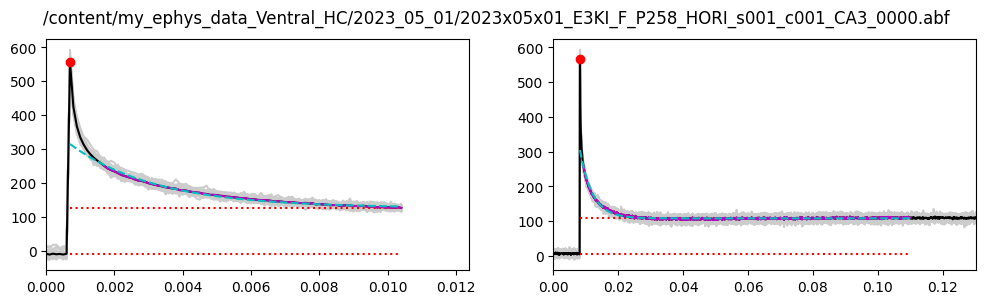

  2%|▏         | 1/54 [00:01<00:55,  1.04s/it]

<Figure size 640x480 with 0 Axes>

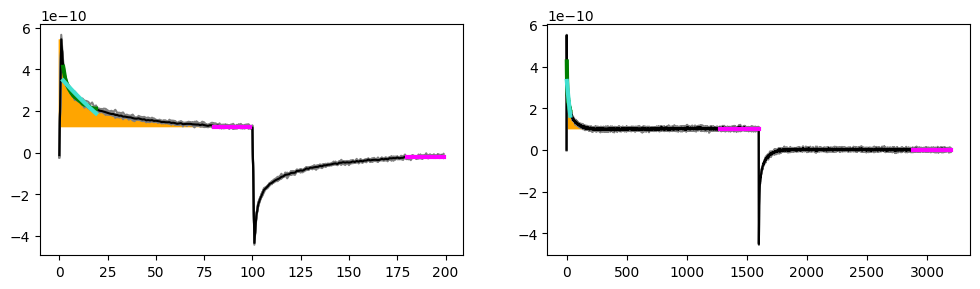

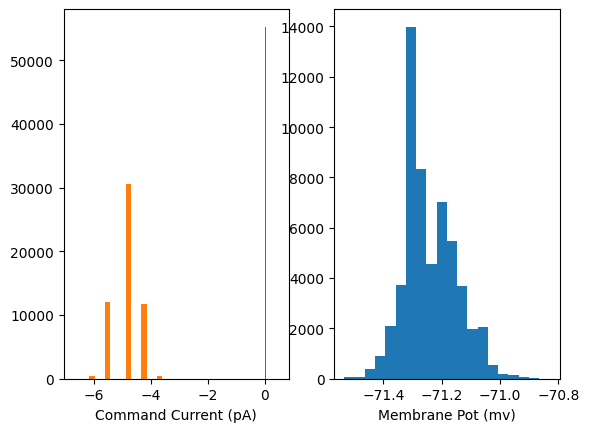

  4%|▎         | 2/54 [00:03<01:42,  1.98s/it]

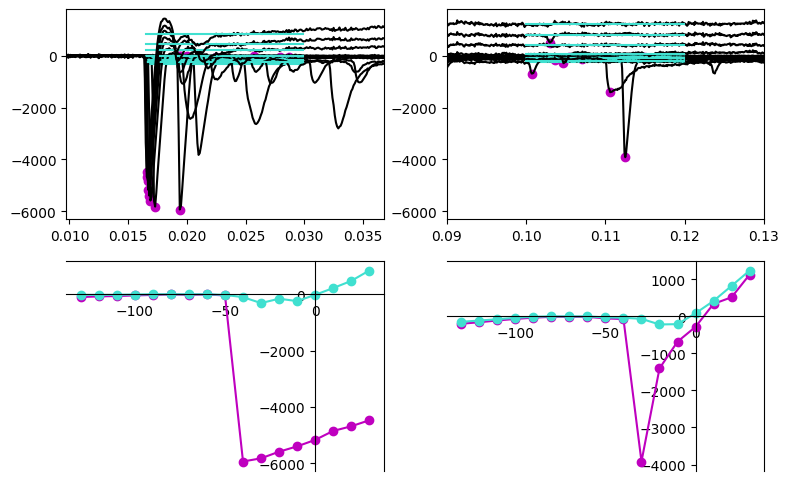

  6%|▌         | 3/54 [00:06<01:59,  2.34s/it]

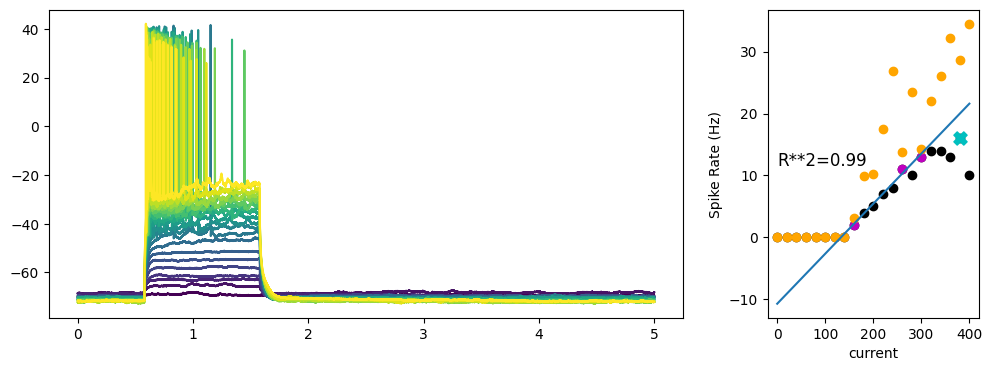

  7%|▋         | 4/54 [00:16<04:20,  5.21s/it]

ap_thresh_us -39.40338515199565


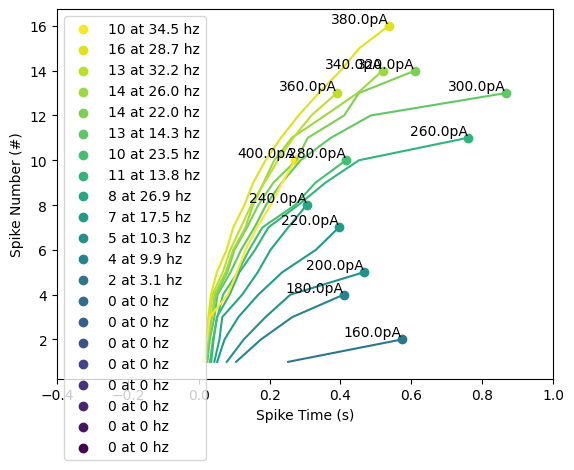

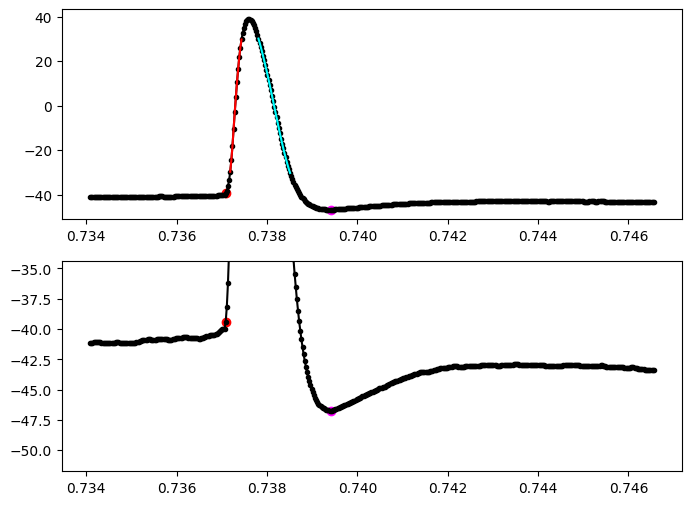

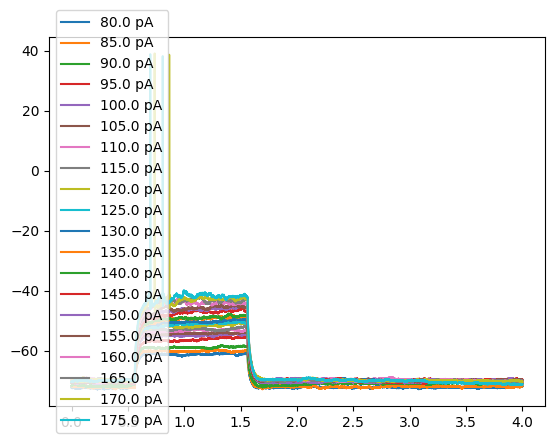

  9%|▉         | 5/54 [00:29<06:46,  8.30s/it]

<Figure size 640x480 with 0 Axes>

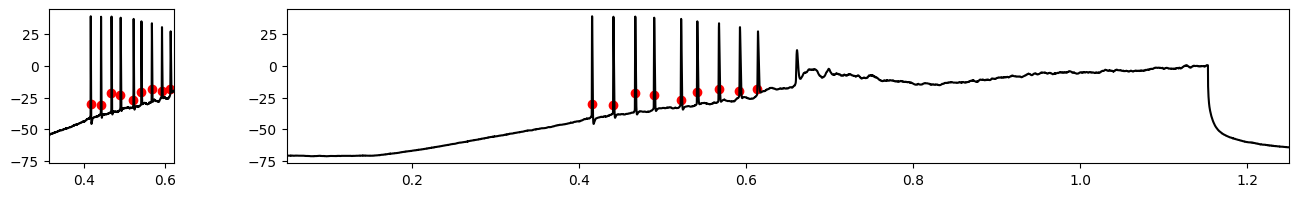

 11%|█         | 6/54 [00:31<04:56,  6.18s/it]

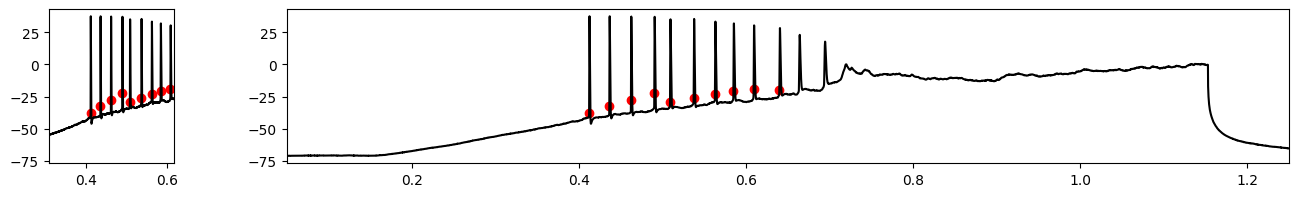

 15%|█▍        | 8/54 [00:35<02:55,  3.81s/it]

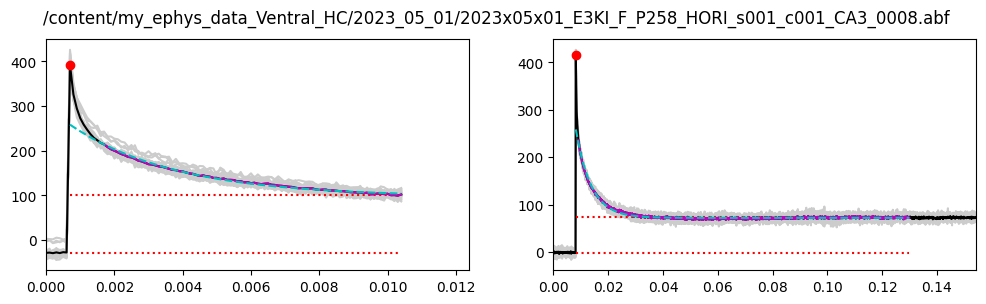

 17%|█▋        | 9/54 [00:36<02:19,  3.11s/it]

<Figure size 640x480 with 0 Axes>

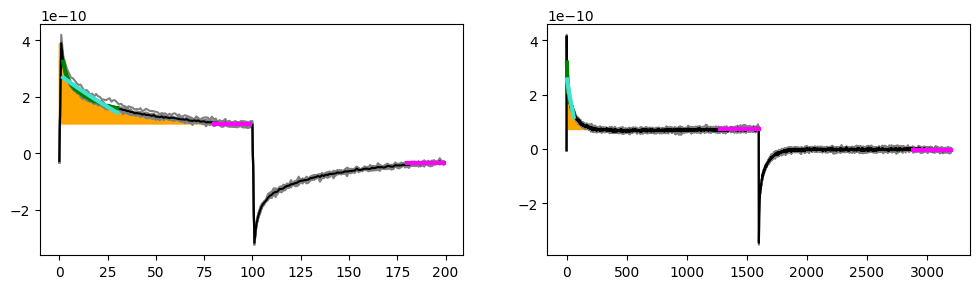

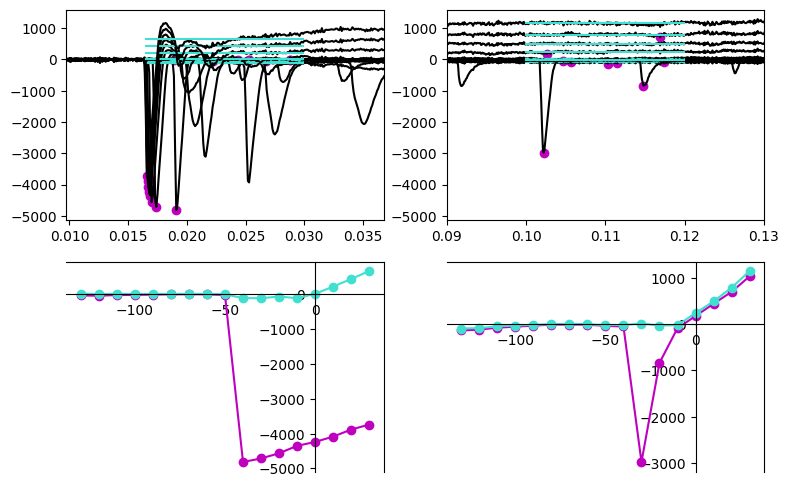

 19%|█▊        | 10/54 [00:42<02:53,  3.94s/it]

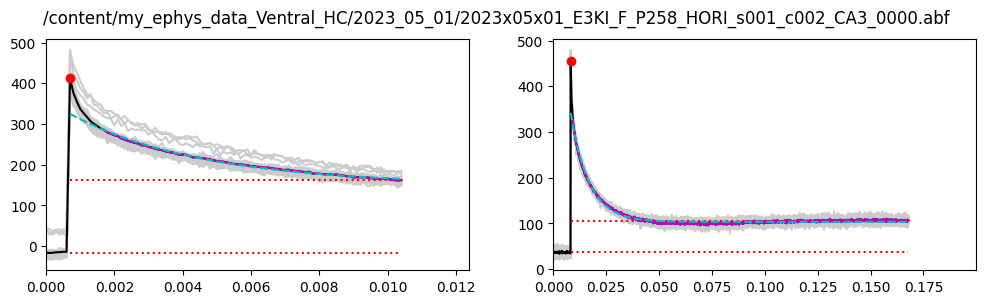

 20%|██        | 11/54 [00:45<02:35,  3.61s/it]

<Figure size 640x480 with 0 Axes>

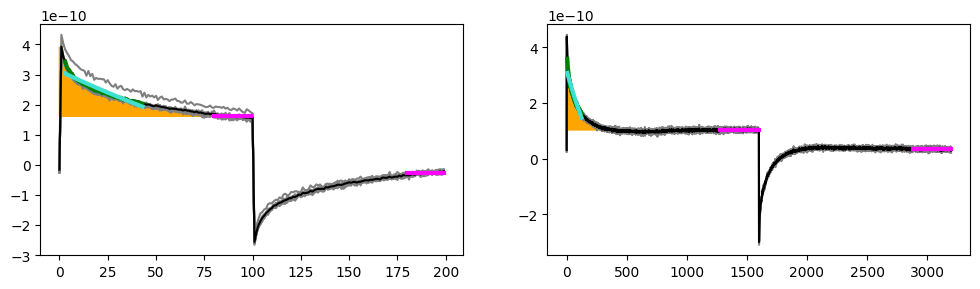

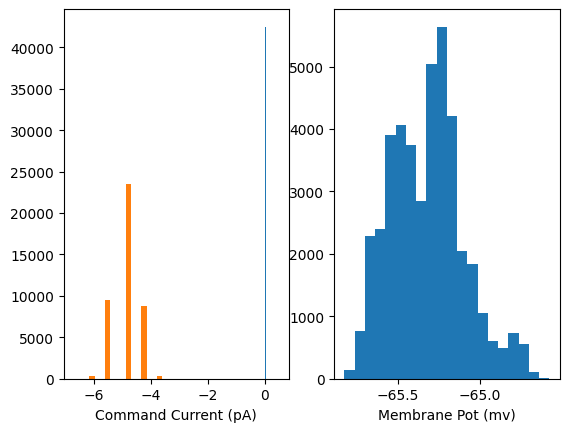

 22%|██▏       | 12/54 [00:48<02:26,  3.49s/it]

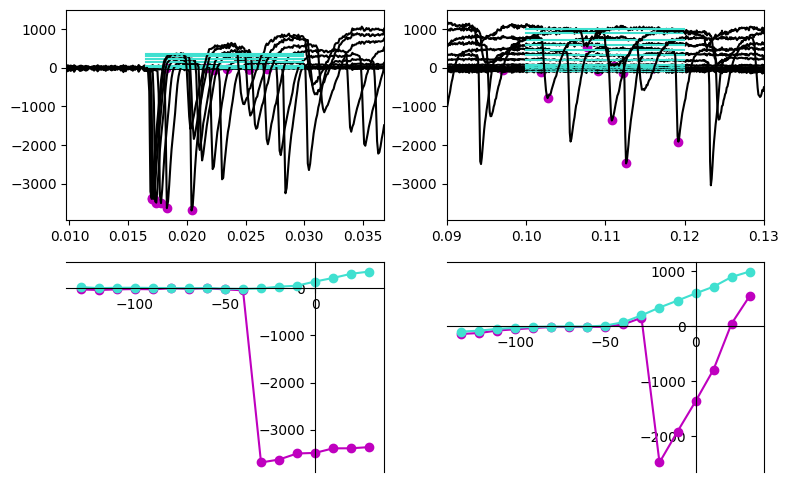

 24%|██▍       | 13/54 [00:51<02:12,  3.22s/it]

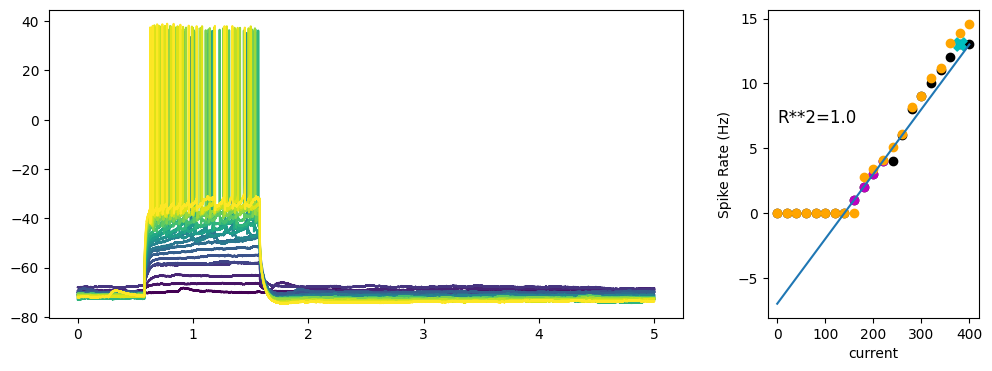

In [ ]:
##### Setup Protocol List
VC_prot = ['VC - MemTest-10ms-160ms',
           'VC - Multi IV - 150ms',]
IC_prot = ['IC - Gain - D20pA',
           'IC - Gain - D50pA',
           'IC - Rheobase',
           'IC - R input',
           'IC - Latentcy 800pA-1s'
           'VC - 3min GapFree',
           'I0 - 3min GapFree']


Fast_results = ephys_wrapper(dataset,VC_prot,IC_prot,strat_cols=[ 'Cell_Type','Slice_Num'])

In [59]:
print(Fast_results.keys())

dict_keys(['abf_recordings_df', 'protocol_set', 'prot_lut', 'problem_recs', 'cell_df', 'cell_df_con', 'cell_df_nd', 'cell_df_csv', 'cell_df_csv_abrg'])


In [9]:

# strat_abfs_by_prot( 'reorg','/content/my_ephys_data_'+dataset['data_name'], f"/content/{dataset['data_name']}_Recording_LookUp.csv" )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
single_val_strat_groups = ['ap_amplitutude',
                            'Rmp_mV',
                            'Ra_160.0',
                            'Rm_160.0',
                            'Cm_pc_10.0',                    
                            'Cmq_160.0',
                            'Ra_160.0',
                            'Rm_160.0',
                            'Gain_(HzpA)',
                            'max_adapt%',
                            'adapt_thresh_90',                            
                            'Rheobase',
                            'AP_thresh_US',
                            'fast_after_hyperpol',
                            'Spike_latency_(ms)',
                            'Input_Resistance_MO',
                            ]


manual_exclusions = [''] # Dramatic shift in seal at unknown time during recording.
exclusion_overide = [''] # Vm dramatically improved prior to gain recording

resp_curve_list = ['IV_Early_(V_stim)','IV_Early_(I_peak)','IV_Steady_State_(I_mean)','Stim_Levels_(pA)','Spike_Counts']
file_naming_scheme = ['Rec_date', 'GenoType', 'Sex', 'Age', 'Slice_Num', 'Cell_num', 'Cell_Type']

strat_df_dict = Fast_results['strat_df_dict'].copy()
filtered_dict, fail_dict = final_qc(strat_df_dict,file_naming_scheme,qc_Rmp=-45,qc_AP_amp=40,qc_RR=.35,qc_Ra=65,manual_exclusions=manual_exclusions,exclusion_overide=exclusion_overide)
alt_strat_dict = restratify_results(filtered_dict,file_naming_scheme,single_val_strat_groups)

response_curve_data = stratify_response_curve(filtered_dict,resp_curve_list,strat_list=[''])
alt_strat_dict.update(response_curve_data)

write_strat_dfs(alt_strat_dict, dataset['data_name']+'_results_stratified_alternate')

KeyError: ignored

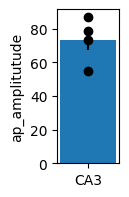

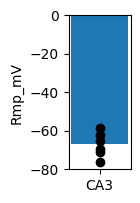

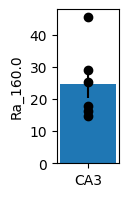

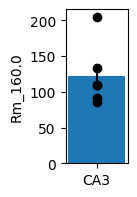

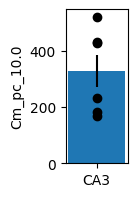

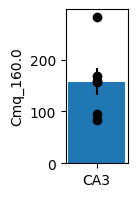

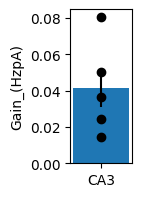

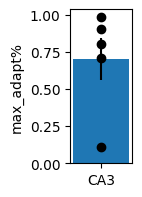

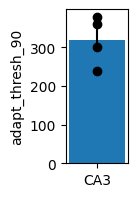

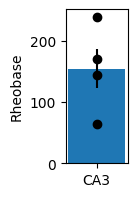

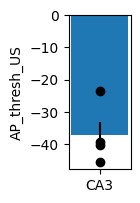

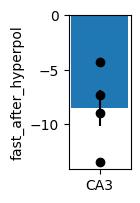

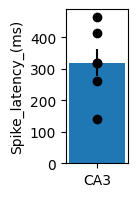

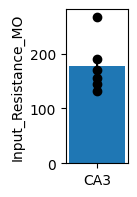

In [55]:


for k,v in alt_strat_dict.items():
    if k in single_val_strat_groups:        
        categs = list(v.columns)
        fig,ax=plt.subplots(1,1, figsize = [ .3 + .5*len(categs), 2])
        for ci in range(len(categs)):
            c_vals = v[categs[ci]]
            c_vals = [vi for vi in c_vals if np.isfinite(vi)]
            c_mean = np.nanmean(c_vals)
            c_sem = np.nanstd(c_vals)/np.sqrt(len(c_vals))
            ax.bar(ci,c_mean,yerr=c_sem)
            ax.scatter([ci]*len(c_vals),c_vals,color='k',marker='o')
        ax.set_xticks(range(len(categs)))
        categs_strats = [str(cat).split("__")[1] for cat in categs]
        ax.set_xticklabels(categs_strats)
        ax.set_ylabel( str(categs[0]).split("__")[0]  )
